# Dataset : 

Link : https://www.kaggle.com/competitions/boston-housing/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_path = "boston-housing/train.csv"
test_path = "boston-housing/test.csv"

In [3]:
train_df = pd.read_csv(train_path)

In [4]:
train_df.columns.to_list()

['ID',
 'crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [5]:
FEATURE_COLUMNS = [
    'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 
    'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat'
]

# Part 1

In [7]:
train_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [8]:
train_df.shape

(333, 15)

In [9]:
def basic_summary(df):
    summary_info = {
        "missing_values": df.isnull().sum(),
        "dtypes": df.dtypes,
        "stats": df.describe().T
    }
    print(summary_info)

In [10]:
basic_summary(train_df)

{'missing_values': ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64, 'dtypes': ID           int64
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object, 'stats':          count        mean         std        min        25%        50%  \
ID       333.0  250.951952  147.859438    1.00000  123.00000  244.00000   
crim     333.0    3.360341    7.352272    0.00632    0.07896    0.26169   
zn       333.0   10.689189   22.674762    0.00000    0.00000    0.00000   
indus    333.0   11.293483    6.998123    0.74000    5.13000    9.90000   
chas     333.0    0.060060    0.237956    0.00000    0.00000    0.00000   
nox

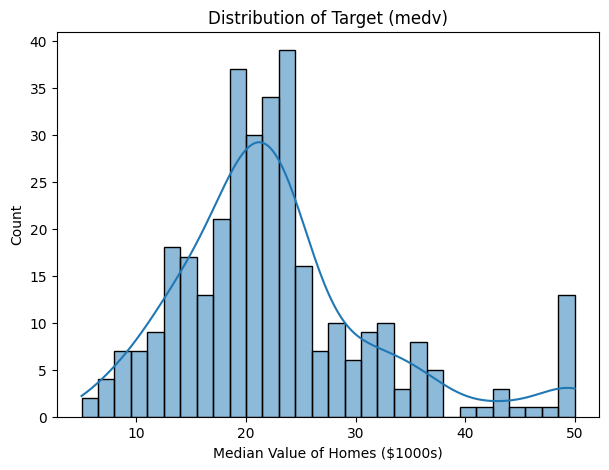

In [11]:
plt.figure(figsize=(7,5))
sns.histplot(train_df["medv"], kde=True, bins=30)
plt.title("Distribution of Target (medv)")
plt.xlabel("Median Value of Homes ($1000s)")
plt.ylabel("Count")
plt.show()

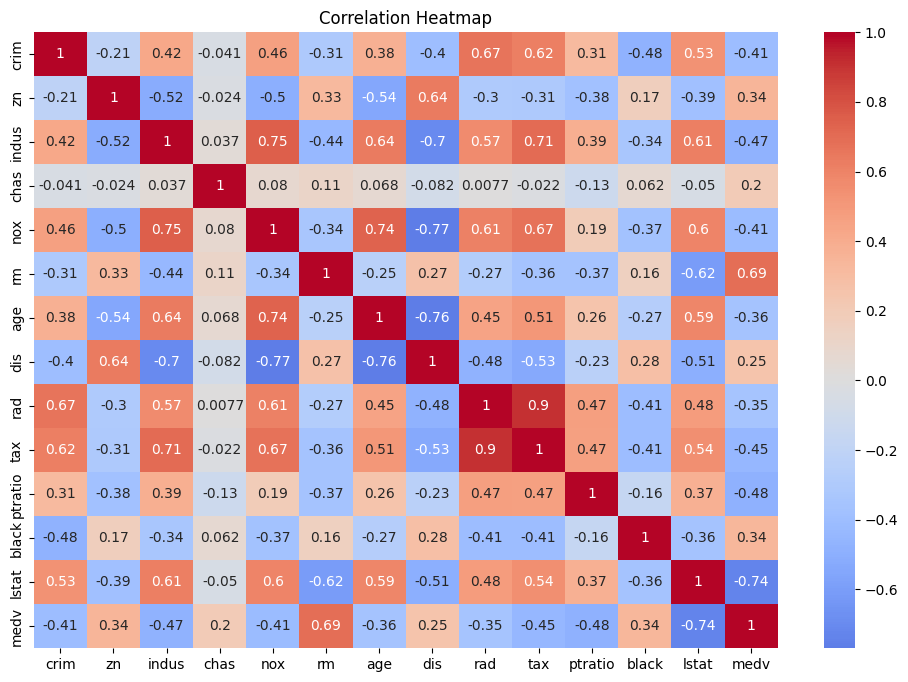

In [12]:
plt.figure(figsize=(12,8))
corr = train_df.drop(columns=["ID"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

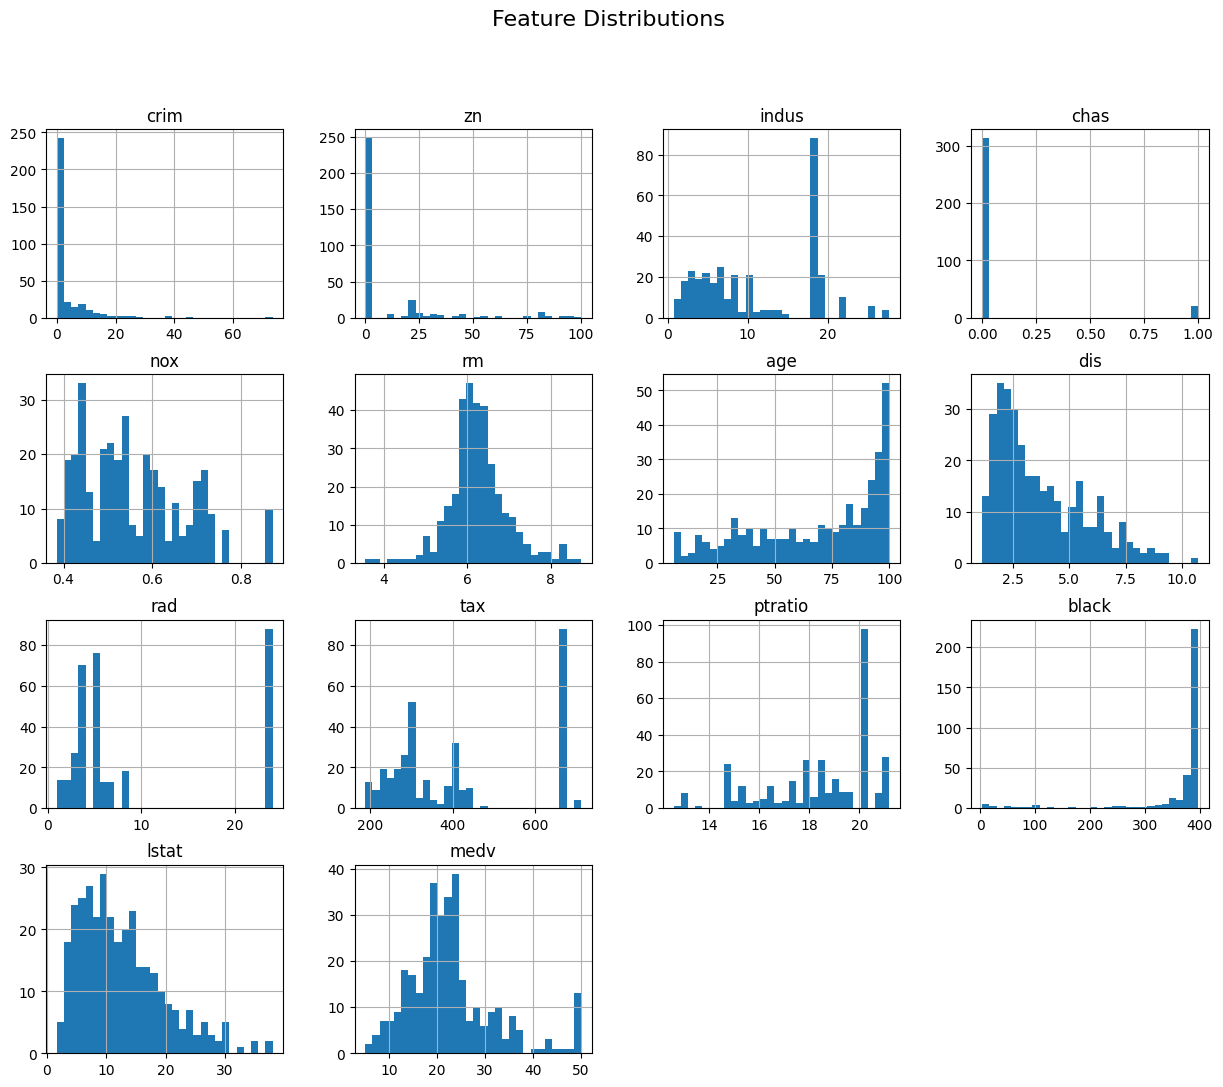

In [13]:
train_df.drop(columns=["ID"]).hist(figsize=(15,12), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

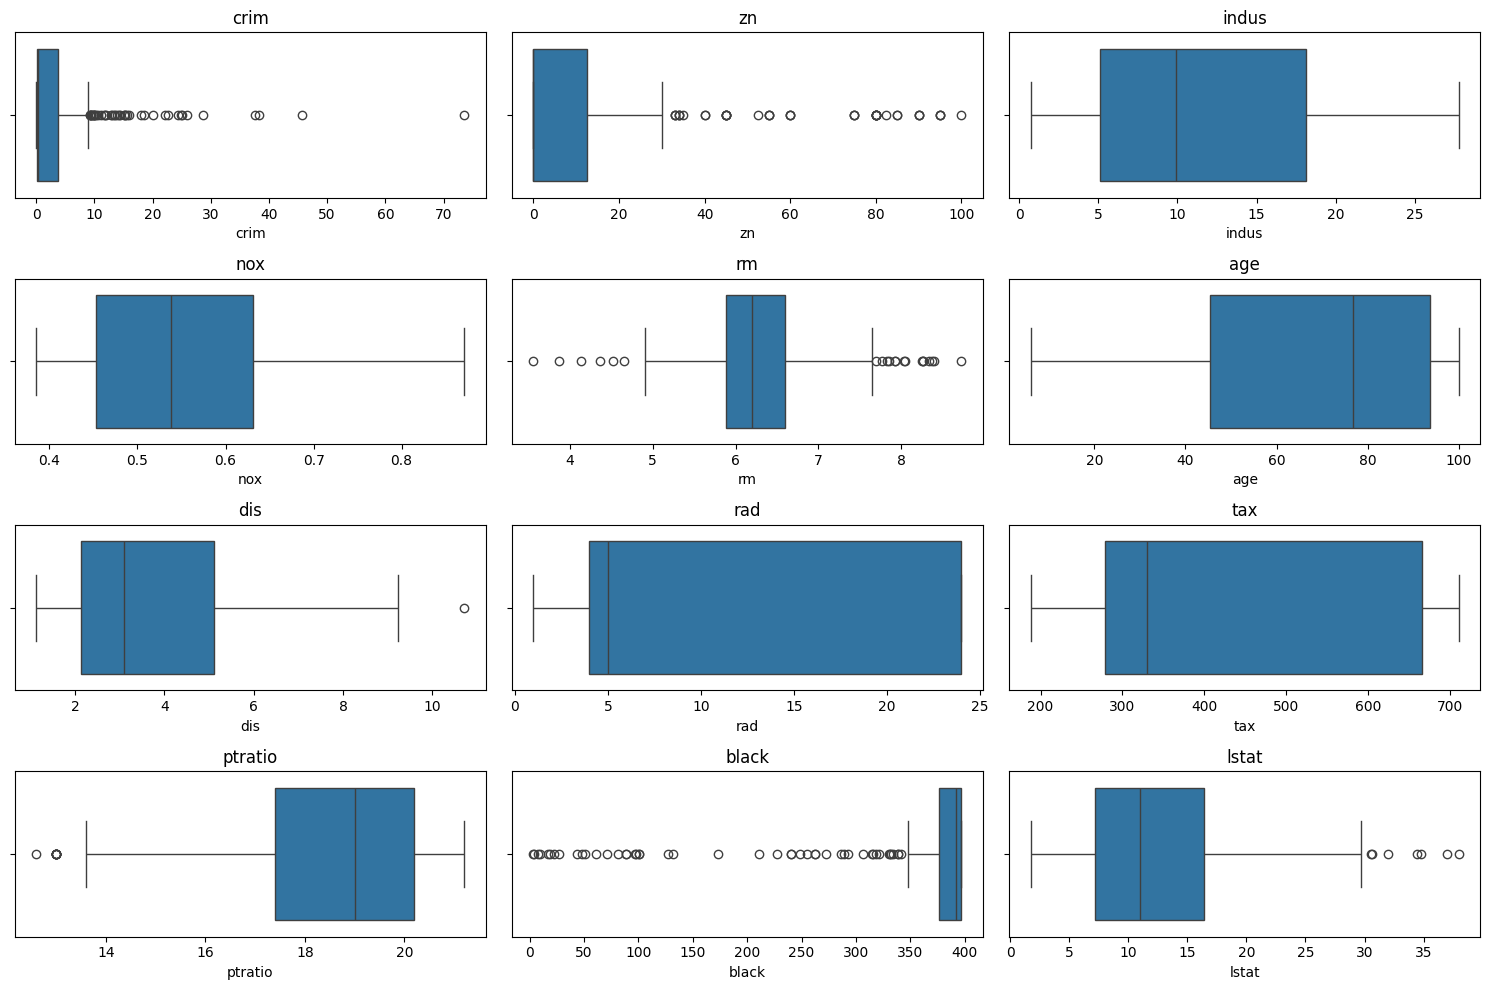

In [14]:
numeric_cols = train_df.drop(columns=["ID", "chas", "medv"]).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=train_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Part 2

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [15]:
# Features and target
X_train_full = train_df.drop(columns=["ID", "medv"])
y_train_full = train_df['medv']

In [17]:
# Perform a Train-Validation Split for model evaluation (80/20 split)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

In [18]:
numeric_features = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'black', 'lstat']
categorical_features = ['chas', 'rad']

In [19]:
numeric_transformer = StandardScaler()

In [20]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

In [21]:
# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [22]:
X_train_processed = preprocessor.fit_transform(X_train_split)
X_test_processed = preprocessor.transform(X_test_split)

In [23]:
print(f"X_train_processed shape: {X_train_processed.shape}")
print(f"X_test_processed shape: {X_test_processed.shape}")

X_train_processed shape: (266, 20)
X_test_processed shape: (67, 20)


In [ ]:
# TRAIN MODEL USING SGDREGRESSOR
sgd_reg = SGDRegressor(
    max_iter=1000,
    eta0=0.01, # Learning rate
    random_state=42
)

# IN ML ALGO -  we only have fit & predict

In [25]:
sgd_reg.fit(X_train_processed, y_train_split)

,"loss loss: str, default='squared_error'The loss function to be used. The possible values are 'squared_error','huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'The 'squared_error' refers to the ordinary least squares fit.'huber' modifies 'squared_error' to focus less on getting outlierscorrect by switching from squared to linear loss past a distance ofepsilon. 'epsilon_insensitive' ignores errors less than epsilon and islinear past that; this is the loss function used in SVR.'squared_epsilon_insensitive' is the same but becomes squared loss pasta tolerance of epsilon.More details about the losses formulas can be found in the:ref:`User Guide `.",'squared_error'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",'l2'
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance, default=NoneUsed for shuffling the data, when ``shuffle`` is set to ``True``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42


In [26]:
# 20 features --> y = MX + C 
# M --> 20m
# C --> 1

sgd_reg.coef_, sgd_reg.intercept_

(array([-0.37793492,  1.44808695, -0.32132364, -1.5279343 ,  2.37526604,
        -0.39357937, -3.52899026, -1.15657335, -1.55039072,  0.69211284,
        -4.38475817,  3.31127451,  0.61052522,  2.96089653,  1.49482397,
         1.75925969,  0.39099955,  2.33406478,  3.64693471,  6.0595485 ]),
 array([19.7992466]))

In [27]:
len(sgd_reg.coef_)

20

In [28]:
# OLS
linear_reg_ols = LinearRegression()
linear_reg_ols.fit(X_train_processed, y_train_split)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


# Test Model

In [29]:
# With SGD
y_test_pred = sgd_reg.predict(X_test_processed)
y_train_pred = sgd_reg.predict(X_train_processed)

In [30]:
# with OLS
y_test_pred_ols = linear_reg_ols.predict(X_test_processed)
y_train_pred_ols = linear_reg_ols.predict(X_train_processed)

In [80]:
def plot_actual_vs_predicted_lines(y_actual, y_predicted):
    plt.figure(figsize=(14, 7))

    if isinstance(y_actual, pd.Series):
        y_actual = y_actual.values
    
    plt.plot(y_actual, label='Actual Values', color='#1f77b4', linewidth=2)

    plt.plot(y_predicted, label='Predicted Values', color='#ff7f0e', linewidth=2, linestyle='--')
    
    plt.title('Actual vs. Predicted Values Over Index (Trend Comparison)')
    plt.xlabel('Data Index')
    plt.ylabel('Median Home Value')
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()


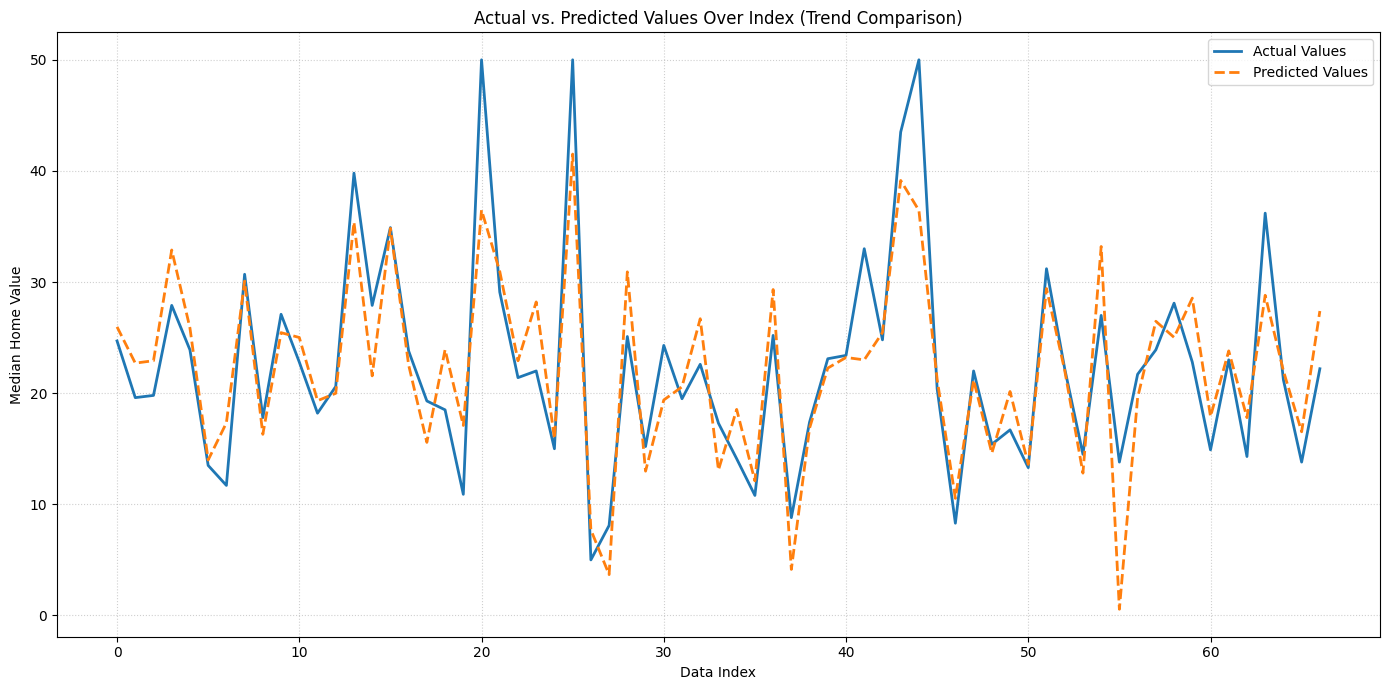

In [81]:
plot_actual_vs_predicted_lines(y_test_split, y_test_pred)

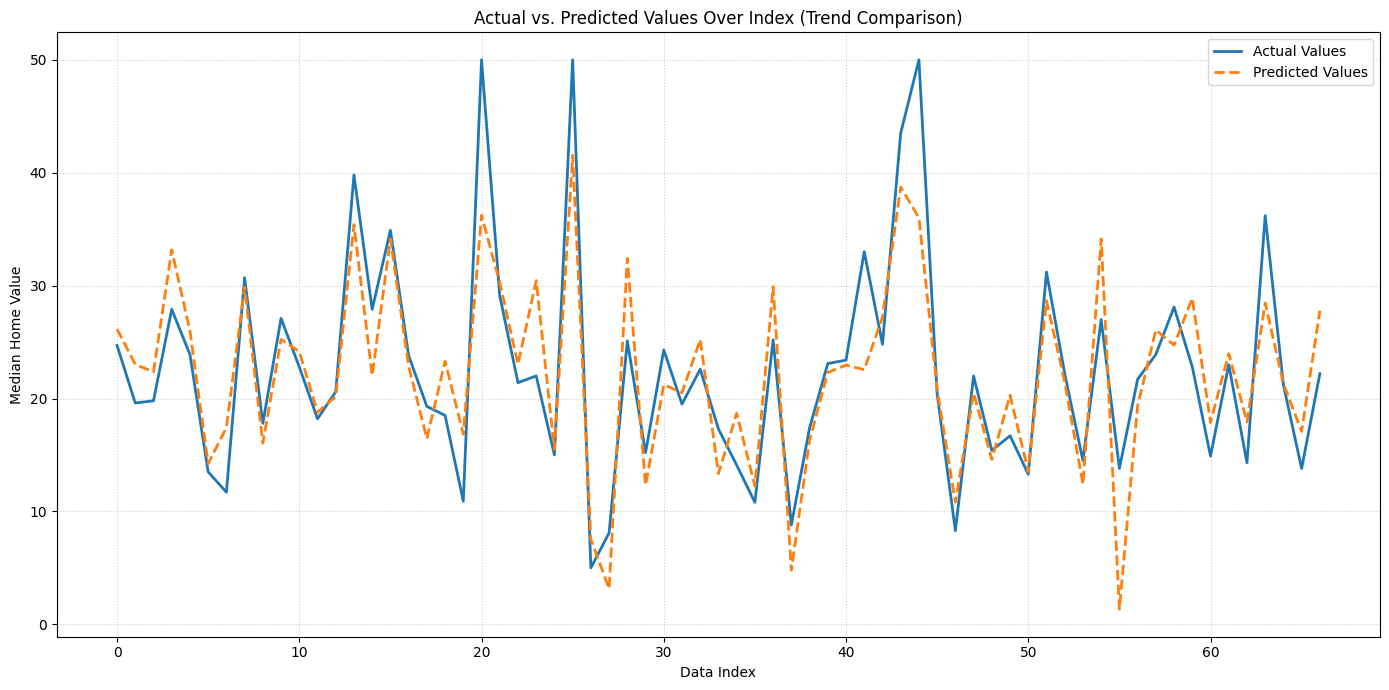

In [88]:
plot_actual_vs_predicted_lines(y_test_split, y_test_pred_ols)

In [43]:
# Evaluation
from sklearn.metrics import mean_squared_error

In [90]:
mse_train = mean_squared_error(y_train_split, y_train_pred)
mse_test = mean_squared_error(y_test_split, y_test_pred)

print(f"MSE (TRAIN) (SGD) : {mse_train}")
print(f"MSE (TEST) (SGD): {mse_test}")

MSE (TRAIN) (SGD) : 22.10430713998983
MSE (TEST) (SGD): 21.3468967417432


In [92]:
mse_train_ols = mean_squared_error(y_train_split, y_train_pred_ols)
mse_test_ols = mean_squared_error(y_test_split, y_test_pred_ols)

print(f"MSE (TRAIN) (OLS) : {mse_train_ols}")
print(f"MSE (TEST) (OLS) : {mse_test_ols}")

MSE (TRAIN) (OLS) : 21.609672351240096
MSE (TEST) (OLS) : 22.382126161642862


# Save Artefacts

In [31]:
import joblib

In [32]:
model_filename = 'final_sgd_reg_model.joblib'
preprocessor_filename = 'data_preprocessor.joblib'

In [33]:
joblib.dump(sgd_reg, model_filename)
joblib.dump(preprocessor, preprocessor_filename)

['data_preprocessor.joblib']

In [34]:
print(f"\nModel saved to: {model_filename}")
print(f"Preprocessor saved to: {preprocessor_filename}")


Model saved to: final_sgd_reg_model.joblib
Preprocessor saved to: data_preprocessor.joblib
